Part 0: The Dataset
The datataset contains data describing the employees of a company according to the following
features (the order of the features in the dataset may differ):
1. Employee satisfaction level
2. Last evaluation
3. Number of projects
4. Average monthly hours
5. Time spent at the company
6. Whether they have had a work accident
7. Whether they have had a promotion in the last 5 years
8. Sales
9. Salary
10. Whether the employee has left

The ultimate goal of the dataset is to predict whether or not an employee will leave the company.
Notes :
Duration of the test: 2 hours.
Create an exam folder on your desktop and download the csv file that you can find at the link
http://bit.ly/BDA10012017
Go to that folder with the command line and initialize ipython with the
command "ipython notebook".
Frequently save the created notebook file with your name and surname.
At the end of the test send to francesco.guerra@unimore.it the html file of the test
(file / download as / HTML).Part 1: Analysis (10 points)
1. Load the dataset and name it with a variable called "dataset"
2. How many instances are contained in the dataset? _______ The dataset is complete (i.e. for
(i.e. for each instance all attribute values are always specified - there are no missing values)?
values")? _______ Is the dataset balanced with respect to the class to be predicted?
_________ Looking directly at the data, how did having had a promotion
in the last 5 years affected the employee's choice to leave the company?

3. Looking at the mean and median shows that employees working
If you look at the mean and median, do you see that employees working in the firm are generally satisfied? 
If you represent a histogram of employee satisfaction (use the parameter
bins=100 in the function that makes the histogram) you will see that there is an initial block
of employees not satisfied at all. Calculate the value of dissatisfaction of this block
of employees ___________
What do these employees have in common (other than a low level of satisfaction)?

4. Represent in a graph the salary of the dissatisfied employees described in the previous point
previous point.
5. Analyze the industries (attribute "sales") in which the dissatisfied employees are placed.
Is there an industry that is a greater source of discomfort?
Part 2: Transformation and Prediction (20 points)
1. Scikit-learn uses a numpy array to make its predictions. The elements
of the numpy array must be of the same numeric data type. It is therefore necessary to
transform the dataset to make it usable with scikit.
Create a new dataset from the previous one and call it reduced in we consider
only the numeric features.
2. In the original dataset, transform the values of non-numeric fields to numeric,
using a transformation function.
3. You want to predict whether an employee has left the company or not (feature
left)on the basis of the other attributes present in the dataset. To divide the two datasets (that one
dataset (the original and the reduced one) so that 3⁄4 of the elements are contained in a new
train" dataset and 1⁄4 in the "test" dataset.
Evaluate the accuracy obtained with the MultinomialNB model on both datasets
(from sklearn.naive_bayes import MultinomialNB)
4. The accuracy value obtained is _____________.
What do you find out by analyzing the confusion matrix?
5. If you use a Decision Tree based model what accuracy value do you get?
Does it change anything in the confusion matrix?
6. What accuracy value do you get with 5 Fold cross validation and the Decision Tree based model  and the Multinomial based model?
Decision Tree based model ________________ and MultinomialNB based model
________________
7. Create a dataset balanced with respect to the "left" attribute, and see if it changes
accuracy with 5 Fold cross validation and the Decision Tree based model
________________ and the model based on MultinomialNB ________________
8. Create a 1-of-V version of the matrix (indicator matrix) regarding the
columns "sales" and "salary". This is a matrix in which each column is transformed into a number of columns equal to the cardinality.
number of columns equal to the cardinality (the unique values) of the domain of the original column.
original column. Each cell in the column takes on a value of 0 or 1 depending on whether the
value initially contained by the attribute is equal to that represented by the
column
Calculate the accuracy using the previous methods. Does it get better or worse? This type of
transformation is generally better or worse than the one performed in step 2?
9. Group the values of the "average_montly_hours" attribute into 6 groups. Replace the original
attribute's original value with a number from 1 to 6 indicating membership in the specific group.
to the specific group. Evaluate the accuracy.
10. Consider a new dataset obtained through an arbitrary variation of the previous one
Consider a new dataset obtained through any variation of the previous one and analyze the accuracy obtained with a model based on Decision Tree.
What value do you get? ________________

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/HR_comma_sep_orig.csv')

2. How many instances are contained in the dataset? _______ The dataset is complete (i.e. for
(i.e. for each instance all attribute values are always specified - there are no missing values)?
values")? _______ Is the dataset balanced with respect to the class to be predicted?
_________ Looking directly at the data, how did having had a promotion
in the last 5 years affected the employee's choice to leave the company?

In [3]:
df.shape

(14999, 10)

In [4]:
df.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
df.satisfaction_level.hist()

<AxesSubplot:>

In [6]:
df[df['promotion_last_5years'] == 1].groupby('left').size()

left
0    300
1     19
dtype: int64

If you look at the mean and median, do you see that employees working in the firm are generally satisfied? If you represent a histogram of employee satisfaction (use the parameter bins=100 in the function that makes the histogram) you will see that there is an initial block of employees not satisfied at all. Calculate the value of dissatisfaction of this block of employees ___ What do these employees have in common (other than a low level of satisfaction)?

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
df.satisfaction_level.mean()

0.6128335222348156

In [9]:
df.satisfaction_level.median()

0.64

<AxesSubplot:>

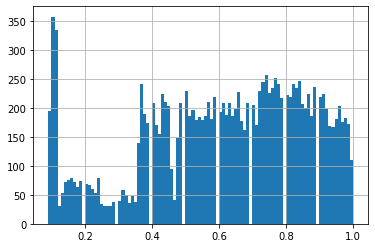

In [10]:
df.satisfaction_level.hist(bins=100)

In [11]:
df.sort_values('satisfaction_level')[:300].satisfaction_level.mean()

0.09349999999999997

In [12]:
df.sort_values('satisfaction_level')[:300].describe() # no promotions, many projects, lots of hours, little more time at comp. in common

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.0
mean,0.093500,0.871100,6.166667,275.493333,4.103333,0.033333,1.0,0.0
std,0.004778,0.068347,0.588822,20.594751,0.373883,0.179805,0.0,0.0
min,0.090000,0.620000,3.000000,179.000000,2.000000,0.000000,1.0,0.0
25%,0.090000,0.820000,6.000000,258.000000,4.000000,0.000000,1.0,0.0
50%,0.090000,0.870000,6.000000,275.000000,4.000000,0.000000,1.0,0.0
75%,0.100000,0.930000,6.000000,292.000000,4.000000,0.000000,1.0,0.0
max,0.100000,0.980000,7.000000,310.000000,5.000000,1.000000,1.0,0.0


In [13]:
#df.sort_values('satisfaction_level')[300:].describe()

Represent in a graph the salary of the dissatisfied employees described in the previous point previous point.

<AxesSubplot:>

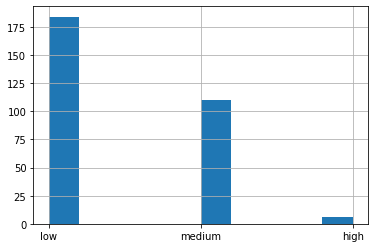

In [14]:
df.sort_values('satisfaction_level')[:300].salary.hist()

Analyze the industries (attribute "sales") in which the dissatisfied employees are placed. Is there an industry that is a greater source of discomfort? 

In [15]:
df.sort_values('satisfaction_level')[:300].groupby('sales').size()

sales
IT             32
RandD          10
accounting     13
hr             17
management      7
marketing      14
product_mng    18
sales          75
support        40
technical      74
dtype: int64

## Part 2

### Scikit-learn uses a numpy array to make its predictions. The elements of the numpy array must be of the same numeric data type. It is therefore necessary to transform the dataset to make it usable with scikit. Create a new dataset from the previous one and call it reduced in we consider only the numeric features.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
reduced = df.drop(['sales','salary'], axis=1)

In [18]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


### In the original dataset, transform the values of non-numeric fields to numeric, using a transformation function.

In [19]:
new_sales = {'sales': 0, 
            'accounting':1, 
            'hr':2, 
            'technical':3, 
            'support':4, 
            'management':5,
            'IT':6, 
            'product_mng':7, 
            'marketing':8, 
            'RandD':9}
new_salary = {'low': 0,
              'medium':1,
              'high':2}
df["sales"]= df["sales"].map(new_sales)
df["salary"]= df["salary"].map(new_salary)

### You want to predict whether an employee has left the company or not (feature left)on the basis of the other attributes present in the dataset. To divide the two datasets (that one dataset (the original and the reduced one) so that 3⁄4 of the elements are contained in a new train" dataset and 1⁄4 in the "test" dataset. Evaluate the accuracy obtained with the MultinomialNB model on both datasets (from sklearn.naive_bayes import MultinomialNB)

In [20]:
y = df.left
X = df.loc[:, df.columns != 'left']

In [21]:
y_red = y
X_red = reduced.loc[:, reduced.columns != 'left']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.25, random_state=0)


/home/hannah/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.776

In [24]:
clf_red = MultinomialNB()
y_red_pred = clf_red.fit(X_red_train, y_red_train).predict(X_red_test)
accuracy_score(y_red_test, y_red_pred)

0.7682666666666667

### The accuracy value obtained is _. What do you find out by analyzing the confusion matrix?

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2852,   29],
       [ 811,   58]])

In [26]:
confusion_matrix(y_test, y_red_pred)

array([[2881,    0],
       [ 869,    0]])

### If you use a Decision Tree based model what accuracy value do you get? Does it change anything in the confusion matrix?

In [27]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf_dt = DecisionTreeClassifier()
y_pred_dt = clf_dt.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9781333333333333

In [28]:
confusion_matrix(y_test, y_pred_dt)

array([[2825,   56],
       [  26,  843]])

In [29]:
clf_red_dt = DecisionTreeClassifier()
y_red_pred_dt = clf_red_dt.fit(X_red_train, y_red_train).predict(X_red_test)
accuracy_score(y_red_test, y_red_pred_dt)

0.9808

In [30]:
confusion_matrix(y_test, y_red_pred_dt)

array([[2834,   47],
       [  25,  844]])

### What accuracy value do you get with 5 Fold cross validation and the Decision Tree based model and the Multinomial based model? Decision Tree based model ____ and MultinomialNB based model

In [31]:
from sklearn.model_selection import cross_val_score

cv_results_lr = cross_val_score(MultinomialNB(), X, y, cv=5, scoring="accuracy")
cv_results_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring="accuracy")
cv_results_lr_red = cross_val_score(MultinomialNB(), X_red, y_red, cv=5, scoring="accuracy")
cv_results_dt_red = cross_val_score(DecisionTreeClassifier(), X_red, y_red, cv=5, scoring="accuracy")

In [32]:
print('Cross Validation NB: ', cv_results_lr.mean())
print('Cross Validation DT: ', cv_results_dt.mean())
print('Cross Validation NB red: ', cv_results_lr_red.mean())
print('Cross Validation DT red: ', cv_results_dt_red.mean())

Cross Validation NB:  0.7624486606646661
Cross Validation DT:  0.9763985773035456
Cross Validation NB red:  0.7549818161609425
Cross Validation DT red:  0.9746648660664666


### Create a dataset balanced with respect to the "left" attribute, and see if it changes accuracy with 5 Fold cross validation and the Decision Tree based model ____ and the model based on MultinomialNB ____

In [33]:
g = df.groupby('left')
new_df = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)

In [34]:
g = reduced.groupby('left')
new_reduced = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)

In [35]:
new_reduced.left.value_counts()

0    3571
1    3571
Name: left, dtype: int64

In [36]:
y = new_df.left
X = new_df.loc[:, new_df.columns != 'left']
y_red = y
X_red = new_reduced.loc[:, new_reduced.columns != 'left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.25, random_state=0)

In [37]:
cv_results_lr = cross_val_score(MultinomialNB(), X, y, cv=5, scoring="accuracy")
cv_results_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring="accuracy")
cv_results_lr_red = cross_val_score(MultinomialNB(), X_red, y_red, cv=5, scoring="accuracy")
cv_results_dt_red = cross_val_score(DecisionTreeClassifier(), X_red, y_red, cv=5, scoring="accuracy")

In [38]:
print('Cross Validation NB: ', cv_results_lr.mean())
print('Cross Validation DT: ', cv_results_dt.mean())
print('Cross Validation NB red: ', cv_results_lr_red.mean())
print('Cross Validation DT red: ', cv_results_dt_red.mean())

Cross Validation NB:  0.6454751809751192
Cross Validation DT:  0.9630352070849334
Cross Validation NB red:  0.7469881584544245
Cross Validation DT red:  0.9620552069673216


### Create a 1-of-V version of the matrix (indicator matrix) regarding the columns "sales" and "salary". This is a matrix in which each column is transformed into a number of columns equal to the cardinality (the unique values) of the domain of the original column. Each cell in the column takes on a value of 0 or 1 depending on whether the value initially contained by the attribute is equal to that represented by the column Calculate the accuracy using the previous methods. Does it get better or worse? This type of transformation is generally better or worse than the one performed in step 2?

In [39]:
df = pd.read_csv('./data/HR_comma_sep_orig.csv')
sales = pd.get_dummies(df['sales'])
salary = pd.get_dummies(df['salary'])

df_dummy = df.drop(['sales', 'salary'],axis=1)
df_dummy = pd.concat([df_dummy, sales, salary], axis=1)

In [40]:
df_dummy

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [41]:
y = df_dummy.left
X = df_dummy.loc[:, df_dummy.columns != 'left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [42]:
cv_results_lr = cross_val_score(MultinomialNB(), X, y, cv=5, scoring="accuracy")
cv_results_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring="accuracy")

In [43]:
print('Cross Validation NB: ', cv_results_lr.mean())
print('Cross Validation DT: ', cv_results_dt.mean())

Cross Validation NB:  0.757115838612871
Cross Validation DT:  0.9747316883405579


### Group the values of the "average_montly_hours" attribute into 6 groups. Replace the original attribute's original value with a number from 1 to 6 indicating membership in the specific group. to the specific group. Evaluate the accuracy.

In [44]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [45]:
df_dummy['average_montly_hours'] = pd.cut(df_dummy['average_montly_hours'], bins=6, labels=[1,2,3,4,5,6])

In [46]:
y = df_dummy.left
X = df_dummy.loc[:, df_dummy.columns != 'left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
cv_results_lr = cross_val_score(MultinomialNB(), X, y, cv=5, scoring="accuracy")
cv_results_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring="accuracy")
print('Cross Validation NB: ', cv_results_lr.mean())
print('Cross Validation DT: ', cv_results_dt.mean())

Cross Validation NB:  0.7575826831165944
Cross Validation DT:  0.9719314660442369


### Consider a new dataset obtained through any variation of the previous one and analyze the accuracy obtained with a model based on Decision Tree. What value do you get? ____

In [47]:
bs_df = df_dummy.drop(['last_evaluation'], axis= 1)

In [48]:
clf_dummy = DecisionTreeClassifier()
y_pred_dummy = clf_dummy.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_dummy)

0.9762666666666666

In [50]:
y = bs_df.left
X = bs_df.loc[:, bs_df.columns != 'left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf_bs = DecisionTreeClassifier()
y_pred_bs = clf_bs.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_bs)

0.9712